In [52]:
import shap
import pandas as pd
import scipy as sp
import numpy as np
from irf.ensemble import wrf
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from treeinterpreter.feature_importance import feature_importance as FI
from treeinterpreter.feature_importance import MDA
import time
from sklearn.linear_model import lasso_stability_path

# Compare different methods in terms of feature selection using simulated data

In [48]:
problem = 'regression'
num = 1
tree_depth = 'shallow'
tmp = np.load('../intermediate/04_aggregate/{}{}/new_results_{}.npz'.format(problem, num, tree_depth))
debiased, gini, SHAP, mda = [tmp[x] for x in list(tmp)]
tmp2 = pd.read_csv('../intermediate/04_aggregate_R_max_features_10/auc_df_{}{}_{}.csv'.format(problem, num, tree_depth))
gini_R, ranger, cforest = np.array(tmp2.iloc[:, 1]), np.array(tmp2.iloc[:, 2]), np.array(tmp2.iloc[:, 3])
gini_R, ranger, cforest
out = np.array([debiased, SHAP,ranger, mda, cforest, gini]).T
plt.boxplot(out)
plt.xticks(list(range(1, 7)), ['MDI-oob', 'SHAP', 'ranger', 'MDA', 'cforest', 'MDI'])
plt.show()
print(' ')
[print('{:.3f}'.format(x)) for x in np.mean(out,0)]
print(' ')

FileNotFoundError: [Errno 2] No such file or directory: '../intermediate/04_aggregate/regression1/new_results_shallow.npz'

### load data

In [50]:
X_train = np.loadtxt('../intermediate/04_aggregate/classification1/permuted0_X_train.csv', delimiter=',')
y_train = np.loadtxt('../intermediate/04_aggregate/classification1/permuted0_y_train.csv', delimiter=',')
X_test = np.loadtxt('../intermediate/04_aggregate/classification1/permuted0_X_test.csv', delimiter=',')
y_test = np.loadtxt('../intermediate/04_aggregate/classification1/permuted0_y_test.csv', delimiter=',')
noisy_features = np.loadtxt('../intermediate/04_aggregate/classification1/permuted0_noisy_features.csv', delimiter=',')
n, m = X_train.shape
names = np.arange(m)

### Train RF

In [56]:
alphas, scores = lasso_stability_path(X_train, y_train)

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function lasso_stability_path is deprecated; The function lasso_stability_path is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


[<matplotlib.lines.Line2D at 0x7fa834c34c50>,
 <matplotlib.lines.Line2D at 0x7fa834c34da0>,
 <matplotlib.lines.Line2D at 0x7fa834c34ef0>,
 <matplotlib.lines.Line2D at 0x7fa834c4c080>,
 <matplotlib.lines.Line2D at 0x7fa834c4c1d0>,
 <matplotlib.lines.Line2D at 0x7fa834c4c320>,
 <matplotlib.lines.Line2D at 0x7fa834c4c470>,
 <matplotlib.lines.Line2D at 0x7fa834c4c5c0>,
 <matplotlib.lines.Line2D at 0x7fa834c4c710>,
 <matplotlib.lines.Line2D at 0x7fa834c4c860>,
 <matplotlib.lines.Line2D at 0x7fa834c68470>,
 <matplotlib.lines.Line2D at 0x7fa834c4cac8>,
 <matplotlib.lines.Line2D at 0x7fa834c4cc18>,
 <matplotlib.lines.Line2D at 0x7fa834c4cd68>,
 <matplotlib.lines.Line2D at 0x7fa834c4ceb8>,
 <matplotlib.lines.Line2D at 0x7fa834c5d048>,
 <matplotlib.lines.Line2D at 0x7fa834c5d198>,
 <matplotlib.lines.Line2D at 0x7fa834c5d2e8>,
 <matplotlib.lines.Line2D at 0x7fa834c5d438>,
 <matplotlib.lines.Line2D at 0x7fa834c5d588>,
 <matplotlib.lines.Line2D at 0x7fa834c5d6d8>,
 <matplotlib.lines.Line2D at 0x7fa834c5d828>,
 <matplotlib.lines.Line2D at 0x7fa834c5d978>,
 <matplotlib.lines.Line2D at 0x7fa834c5dac8>,
 <matplotlib.lines.Line2D at 0x7fa834c5dc18>,
 <matplotlib.lines.Line2D at 0x7fa834c5dd68>,
 <matplotlib.lines.Line2D at 0x7fa834c5deb8>,
 <matplotlib.lines.Line2D at 0x7fa834bc7048>,
 <matplotlib.lines.Line2D at 0x7fa834bc7198>,
 <matplotlib.lines.Line2D at 0x7fa834bc72e8>,
 <matplotlib.lines.Line2D at 0x7fa834bc7438>,
 <matplotlib.lines.Line2D at 0x7fa834bc7588>,
 <matplotlib.lines.Line2D at 0x7fa834bc76d8>,
 <matplotlib.lines.Line2D at 0x7fa834bc7828>,
 <matplotlib.lines.Line2D at 0x7fa834bc7978>,
 <matplotlib.lines.Line2D at 0x7fa834bc7ac8>,
 <matplotlib.lines.Line2D at 0x7fa834bc7c18>,
 <matplotlib.lines.Line2D at 0x7fa834bc7d68>,
 <matplotlib.lines.Line2D at 0x7fa834bc7eb8>,
 <matplotlib.lines.Line2D at 0x7fa834bed048>,
 <matplotlib.lines.Line2D at 0x7fa834bed198>,
 <matplotlib.lines.Line2D at 0x7fa834bed2e8>,
 <matplotlib.lines.Line2D at 0x7fa834bed438>,
 <matplotlib.lines.Line2D at 0x7fa834bed588>,
 <matplotlib.lines.Line2D at 0x7fa834bed6d8>,
 <matplotlib.lines.Line2D at 0x7fa834bed828>,
 <matplotlib.lines.Line2D at 0x7fa834bed978>,
 <matplotlib.lines.Line2D at 0x7fa834bedac8>,
 <matplotlib.lines.Line2D at 0x7fa834bedc18>,
 <matplotlib.lines.Line2D at 0x7fa834bedd68>,
 <matplotlib.lines.Line2D at 0x7fa834bedeb8>,
 <matplotlib.lines.Line2D at 0x7fa834be5048>,
 <matplotlib.lines.Line2D at 0x7fa834be5198>,
 <matplotlib.lines.Line2D at 0x7fa834be52e8>,
 <matplotlib.lines.Line2D at 0x7fa834be5438>,
 <matplotlib.lines.Line2D at 0x7fa834be5588>,
 <matplotlib.lines.Line2D at 0x7fa834be56d8>,
 <matplotlib.lines.Line2D at 0x7fa834be5828>,
 <matplotlib.lines.Line2D at 0x7fa834be5978>,
 <matplotlib.lines.Line2D at 0x7fa834be5ac8>,
 <matplotlib.lines.Line2D at 0x7fa834be5c18>,
 <matplotlib.lines.Line2D at 0x7fa834be5d68>,
 <matplotlib.lines.Line2D at 0x7fa834be5eb8>,
 <matplotlib.lines.Line2D at 0x7fa834bd9048>,
 <matplotlib.lines.Line2D at 0x7fa834bd9198>,
 <matplotlib.lines.Line2D at 0x7fa834bd92e8>,
 <matplotlib.lines.Line2D at 0x7fa834bd9438>,
 <matplotlib.lines.Line2D at 0x7fa834bd9588>,
 <matplotlib.lines.Line2D at 0x7fa834bd96d8>,
 <matplotlib.lines.Line2D at 0x7fa834bd9828>,
 <matplotlib.lines.Line2D at 0x7fa834bd9978>,
 <matplotlib.lines.Line2D at 0x7fa834bd9ac8>,
 <matplotlib.lines.Line2D at 0x7fa834bd9c18>,
 <matplotlib.lines.Line2D at 0x7fa834bd9d68>,
 <matplotlib.lines.Line2D at 0x7fa834bd9eb8>,
 <matplotlib.lines.Line2D at 0x7fa834bd1048>,
 <matplotlib.lines.Line2D at 0x7fa834bd1198>,
 <matplotlib.lines.Line2D at 0x7fa834bd12e8>,
 <matplotlib.lines.Line2D at 0x7fa834bd1438>,
 <matplotlib.lines.Line2D at 0x7fa834bd1588>]

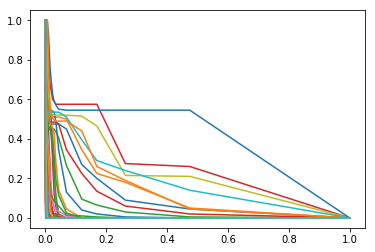

In [58]:
plt.plot(alphas, scores.T)

In [65]:
help(roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics.ranking:

roc_auc_score(y_true, y_score, average='macro', sample_weight=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation is restricted to the binary classification task
    or multilabel classification task in label indicator format.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples] or [n_samples, n_classes]
        True binary labels in binary label indicators.
    
    y_score : array, shape = [n_samples] or [n_samples, n_classes]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    average : string, [None, 'micro', 'macro' (default), 'samples', 'weighted']
        If ``None``, the 

In [69]:
stability_imp = np.max(scores[:, alphas > .3], axis=1)
roc_auc_score(noisy_features, -stability_imp)

0.44

In [14]:
rf = rfc(n_estimators=100, max_features=8)
start = time.time()
%timeit rf.fit(X_train, y_train)
gini_imp = rf.feature_importances_
end = time.time()
end - start

1.42 s ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


11.385199308395386

- accuracy

In [16]:
print('accuracy of RF is {0:.3f}'.format(accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))))

accuracy of RF is 0.667


- Plot feature importance

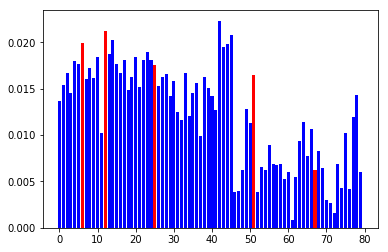

In [19]:
noisy_features = np.array([int(x) for x in noisy_features])
colors = np.array(['red', 'blue'])[noisy_features]
plt.bar(x = np.arange(X_train.shape[1]), height = gini_imp, color = colors)
plt.show()

### prune features based on their importance measures

- classic gini importance

     - plot the gini importance

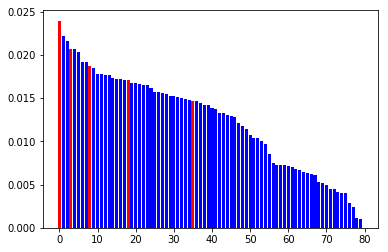

In [9]:
ix = np.argsort(gini_imp * -1)
plt.bar(x = list(range(m)), height = gini_imp[ix], color = colors[ix])
#plt.xticks(list(range(m)), np.array(names)[ix], rotation='vertical')
plt.show()

- debiased gini importance

In [21]:
debiased_fi_mean = OOB_MDI(rf, X_train, y_train, min_samples=40)

NameError: name 'OOB_MDI' is not defined

In [22]:
y_train_one_hot = OneHotEncoder().fit_transform(y_train[:, np.newaxis]).todense()

In [23]:
%timeit debiased_fi_mean, debiased_fi_std = FI(rf, X_train, y_train_one_hot, type='oob', normalized=False, balanced = False)

3.78 s ± 464 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


    - plot debiased gini importance

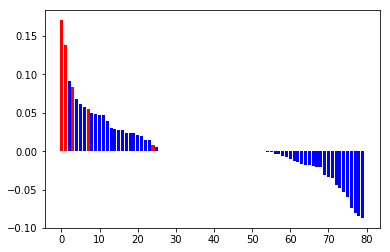

In [109]:
debiased_imp = debiased_fi_mean
ix = np.argsort(debiased_imp * -1)
plt.bar(x = list(range(m)), height = debiased_imp[ix], color=colors[ix])
#plt.xticks(list(range(m)), np.array(names)[ix], rotation='vertical')
plt.show()

- MDA

In [ ]:
MDA_imp, _ = MDA(rf, X_test, y_test[:, np.newaxis], type='test', n_trials=10)
#MDA_imp[MDA_imp < 0] = 0
ix = np.argsort(MDA_imp * -1)
plt.bar(x = list(range(m)), height = MDA_imp[ix], color=colors[ix])
plt.xticks(list(range(m)), np.array(names)[ix], rotation='vertical')
plt.show()

- tree SHAP

In [ ]:
explainer = shap.TreeExplainer(rf)
samples = np.random.choice(range(X_train.shape[0]), 100)
%timeit shap_values = explainer.shap_values(X_train[samples, :])
shap.summary_plot(shap_values, X_train[samples, :], plot_type="bar")

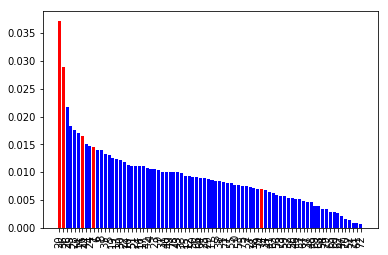

In [15]:
shap_imp = np.mean(abs(shap_values[0]), 0) + np.mean(abs(shap_values[1]), 0)
ix = np.argsort(shap_imp * -1)
plt.bar(x = list(range(m)), height = shap_imp[ix], color=colors[ix])
plt.xticks(list(range(m)), np.array(names)[ix], rotation='vertical')
plt.show()

### Comparison

In [16]:
debiased_imp[debiased_imp < 0] = 0
MDA_imp[MDA_imp < 0] = 0

NameError: name 'MDA_imp' is not defined

In [51]:
roc_auc_score(noisy_features, - debiased_imp)

0.8719999999999999

In [18]:
roc_auc_score(noisy_features, - gini_imp)

0.5840000000000001

In [19]:
roc_auc_score(noisy_features, - shap_imp)

0.8426666666666667

In [ ]:
roc_auc_score(noisy_features, - MDA_imp)

<hr />

### summary of the results from .py file

In [98]:
tmp = np.load('../intermediate/02_simulation_results_correlated_regression.npz')
debiased, gini, shap, mda = [tmp[x] for x in list(tmp)]

In [99]:
tmp2 = pd.read_csv('../intermediate/02_simulation_results_R_correlated_shallow.csv')
gini_R, ranger, cforest = np.array(tmp2.iloc[:, 1]), np.array(tmp2.iloc[:, 2]), np.array(tmp2.iloc[:, 3])
gini_R, ranger, cforest

(array([0.84533333, 0.832     , 0.8       , 0.80533333, 0.59466667,
        0.55733333, 0.70666667, 0.79466667, 0.968     , 0.68      ,
        0.776     , 0.91733333, 0.688     , 0.51733333, 0.65066667,
        0.632     , 0.80266667, 0.688     , 0.77066667, 0.536     ,
        0.456     , 0.64266667, 0.656     , 0.79733333, 0.76      ,
        0.86933333, 0.84266667, 0.936     , 0.60533333, 0.82933333,
        0.824     , 0.80266667, 0.85866667, 0.62666667, 0.656     ,
        0.67733333, 0.62133333, 0.94666667, 0.60266667, 0.78666667]),
 array([0.70933333, 0.86933333, 0.776     , 0.97066667, 0.77066667,
        0.65333333, 0.96533333, 0.96      , 0.992     , 0.79466667,
        0.936     , 0.992     , 0.81866667, 0.784     , 0.72266667,
        0.816     , 0.87733333, 0.73866667, 0.77066667, 0.82666667,
        0.89866667, 0.848     , 0.87466667, 0.83466667, 0.84533333,
        0.85333333, 0.896     , 0.99466667, 0.75733333, 0.87466667,
        0.89066667, 0.896     , 0.76533333, 0.

In [100]:
out = np.array([debiased, shap,ranger, mda, cforest, gini]).T

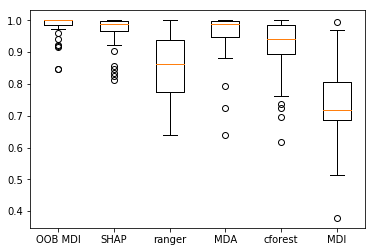

In [101]:
plt.boxplot(out)
plt.xticks(list(range(1, 7)), ['OOB MDI', 'SHAP', 'ranger', 'MDA', 'cforest', 'MDI'])
plt.show()

In [102]:
np.mean(out, 0)

array([0.9806    , 0.96393333, 0.85486667, 0.95666667, 0.9105    ,
       0.73586667])